** About the Dataset**

This dataset has been curated to facilitate the development of a multi-agent AI system aimed at optimizing inventory management and pricing strategies in the retail sector. By combining data from stores, warehouses, suppliers, and customers, the dataset supports advanced AI-driven applications such as demand forecasting, dynamic inventory tracking, and price optimization.

These insights enable businesses to reduce stockouts, lower holding costs, and enhance overall supply chain efficiency.

📊 **Dataset Composition**

Sales Data: Includes historical transactions, product-level sales trends, and seasonal demand variations.

Inventory Levels: Captures real-time stock status across stores and warehouses, including restocking intervals.

Supplier & Logistics Data: Provides delivery schedules, lead times, and supplier performance indicators.

Pricing & Promotions: Records historical price adjustments, discount campaigns, and corresponding customer behavior.

🎯 **Use Case Potential**

This dataset serves as a foundation for training machine learning and multi-agent systems to:

Predict future demand with high accuracy

Automate and optimize inventory replenishment

Develop intelligent pricing and promotion strategies

Improve responsiveness across the supply chain

Ensure product availability while minimizing operational inefficiencies

Description:
This project focuses on leveraging retail data to optimize inventory management and pricing strategies by uncovering key patterns in sales performance. Using a combination of statistical analysis, visualization, and data preprocessing techniques, we analyze:

Sales Quantity across different products, stores, and time periods

Pricing effects on consumer behavior and demand

The impact of promotions, seasonal events, and external factors (such as weather or economic indicators) on sales trends

Variations in demand driven by different customer segments and demand trends (e.g., increasing, stable, decreasing)

Objective:
To generate actionable insights that support:

More accurate demand forecasting

Smarter inventory replenishment

Effective price optimization

Better targeted promotional planning

Ultimately, this data-driven approach aims to enhance profitability, minimize stockouts or overstock, and improve operational efficiency in retail environments.

In [33]:
import numpy as np  # For numerical computations and linear algebra
import pandas as pd  # For data manipulation and handling CSV files
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static plots and charts

Import dataset


In [4]:
df = pd.read_csv('demand.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Store ID             10000 non-null  int64  
 3   Sales Quantity       10000 non-null  int64  
 4   Price                10000 non-null  float64
 5   Promotions           10000 non-null  object 
 6   Seasonality Factors  6685 non-null   object 
 7   External Factors     7574 non-null   object 
 8   Demand Trend         10000 non-null  object 
 9   Customer Segments    10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [6]:
df.head()

,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
0,4277,2024-01-03,48,330,24.38,No,Festival,Competitor Pricing,Increasing,Regular
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium
3,5617,2024-04-04,17,298,13.41,No,NaN,Economic Indicator,Stable,Regular
4,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular


In [7]:
df.describe()

,Product ID,Store ID,Sales Quantity,Price
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5533.521700,50.264900,248.728900,52.447878
std,2568.312468,28.656333,143.767452,27.459355
min,1000.000000,1.000000,1.000000,5.000000
25%,3319.000000,26.000000,125.000000,28.480000
50%,5579.000000,50.000000,249.000000,52.330000
75%,7696.500000,75.000000,373.000000,76.252500
max,9998.000000,99.000000,499.000000,99.990000


In [8]:
df.tail()

,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
9995,6545,2024-11-26,54,47,47.12,No,NaN,Competitor Pricing,Decreasing,Budget
9996,4341,2024-04-08,82,59,65.11,No,Festival,NaN,Increasing,Budget
9997,8679,2024-02-16,55,481,59.97,No,Holiday,Economic Indicator,Stable,Premium
9998,6281,2024-02-15,97,142,48.70,No,Festival,NaN,Decreasing,Regular
9999,4750,2024-03-19,18,19,42.43,Yes,Festival,NaN,Decreasing,Regular


In [9]:
df.isnull().sum()

,0
Product ID,0
Date,0
Store ID,0
Sales Quantity,0
Price,0
Promotions,0
Seasonality Factors,3315
External Factors,2426
Demand Trend,0
Customer Segments,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(10000, 10)

In [12]:
df.dtypes

,0
Product ID,int64
Date,object
Store ID,int64
Sales Quantity,int64
Price,float64
Promotions,object
Seasonality Factors,object
External Factors,object
Demand Trend,object
Customer Segments,object


In [13]:
df.columns

Index(['Product ID', 'Date', 'Store ID', 'Sales Quantity', 'Price',
       'Promotions', 'Seasonality Factors', 'External Factors', 'Demand Trend',
       'Customer Segments'],
      dtype='object')

Correlation Heatmap

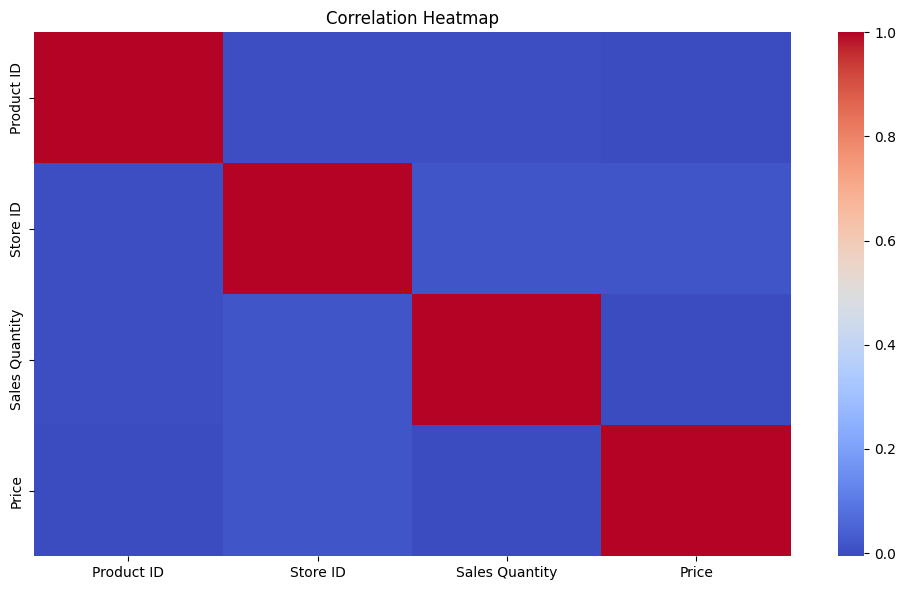

,Sales Quantity
Sales Quantity,1.0


In [15]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Sort correlation with respect to the target variable: 'Sales Quantity'
target_corr = correlation_matrix['Sales Quantity'].sort_values(ascending=False)

# Display top correlations (absolute value above a threshold)
strong_corr = target_corr[abs(target_corr) > 0.1]

# Show correlation heatmap for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

strong_corr


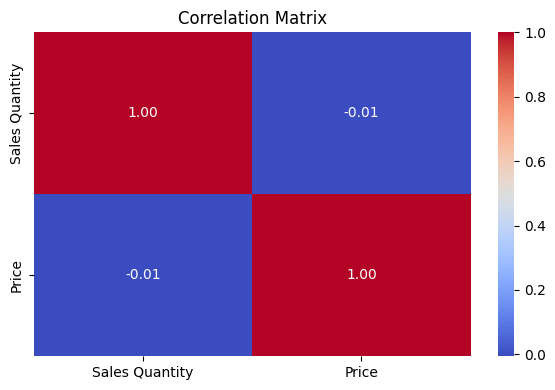

In [16]:
numerical_cols = ['Sales Quantity', 'Price']
corr_matrix = df[numerical_cols].corr()

fig3, ax3 = plt.subplots(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax3)
ax3.set_title("Correlation Matrix")
plt.tight_layout()
plt.show()

visualizations part for Data

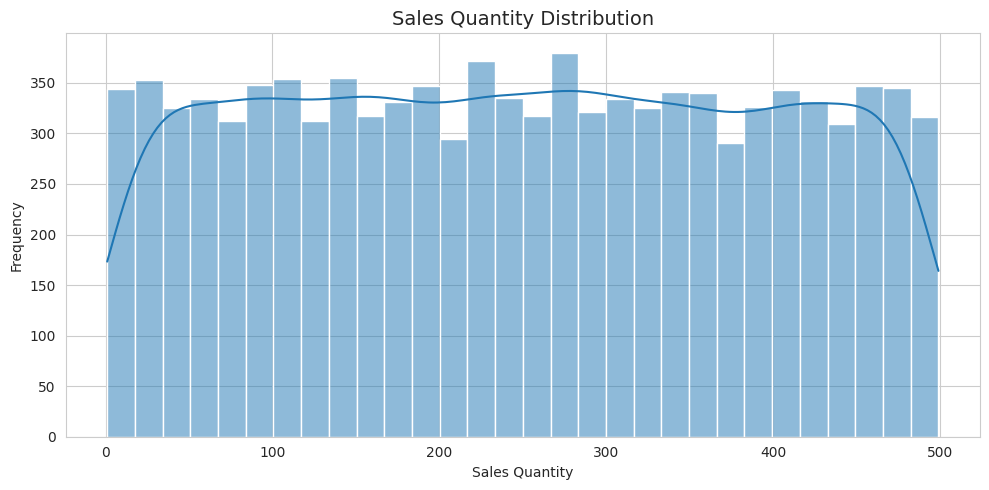

In [17]:
# Set Seaborn style for plots
sns.set_style("whitegrid")

# Plot: Distribution of Sales Quantity
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Sales Quantity', bins=30, kde=True)
plt.title('Sales Quantity Distribution', fontsize=14)
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


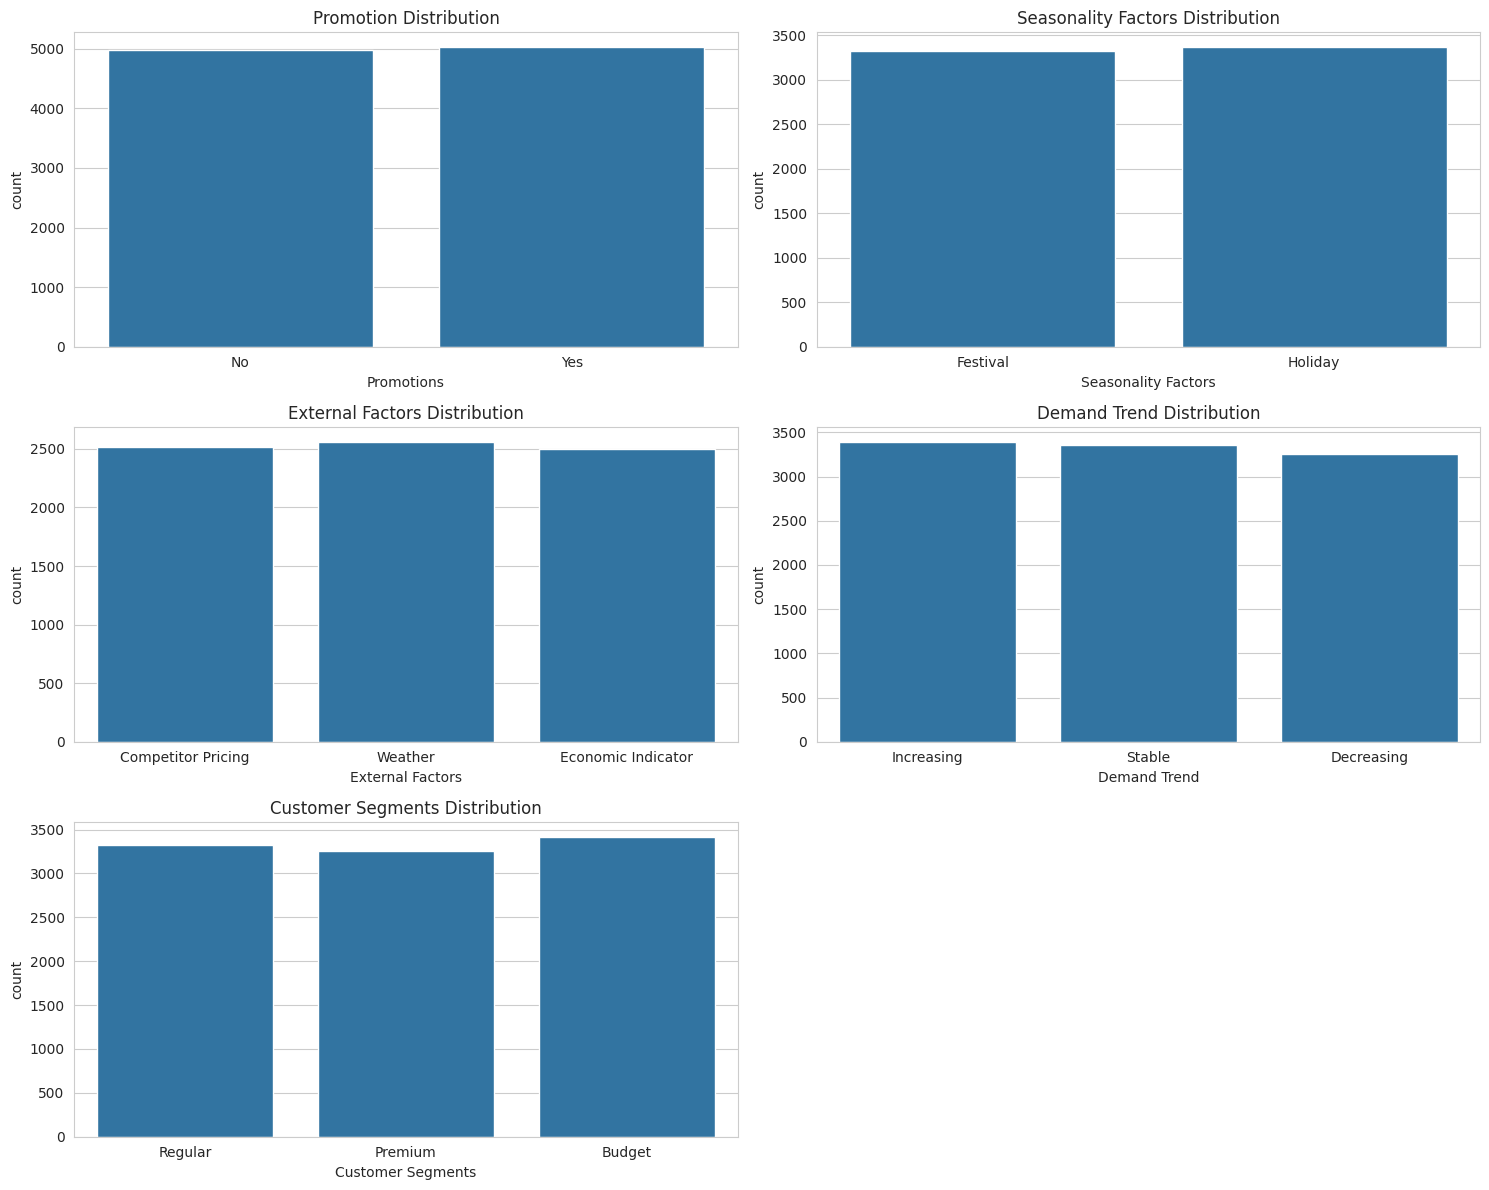

In [18]:
# Count plots for categorical variables
fig4, axs = plt.subplots(3, 2, figsize=(15, 12))
sns.countplot(data=df, x='Promotions', ax=axs[0, 0])
sns.countplot(data=df, x='Seasonality Factors', ax=axs[0, 1])
sns.countplot(data=df, x='External Factors', ax=axs[1, 0])
sns.countplot(data=df, x='Demand Trend', ax=axs[1, 1])
sns.countplot(data=df, x='Customer Segments', ax=axs[2, 0])

axs[0, 0].set_title("Promotion Distribution")
axs[0, 1].set_title("Seasonality Factors Distribution")
axs[1, 0].set_title("External Factors Distribution")
axs[1, 1].set_title("Demand Trend Distribution")
axs[2, 0].set_title("Customer Segments Distribution")

# Hide the last unused subplot
axs[2, 1].axis('off')
plt.tight_layout()
plt.show()


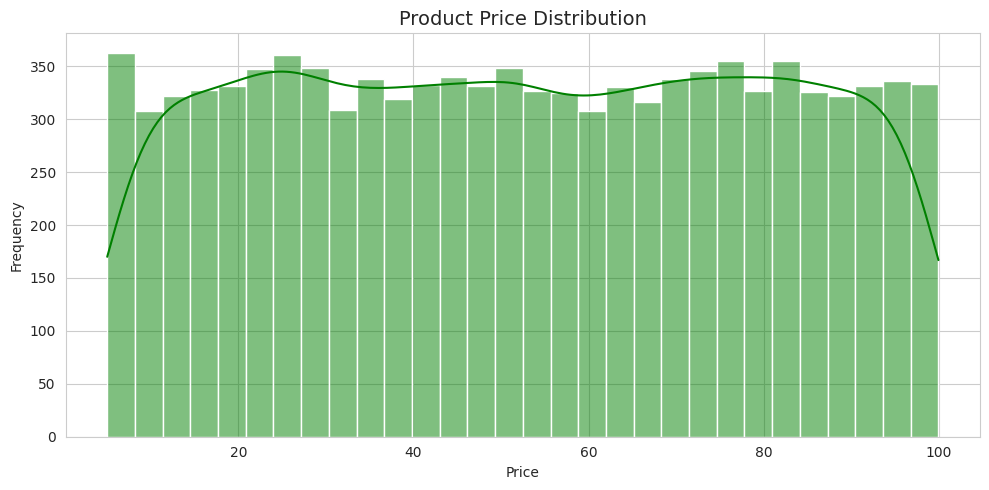

In [19]:
# Plot: Distribution of Product Prices
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Price', bins=30, kde=True, color='green')
plt.title('Product Price Distribution', fontsize=14)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


/tmp/ipython-input-21-746758276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Promotions', y='Sales Quantity', palette='coolwarm')


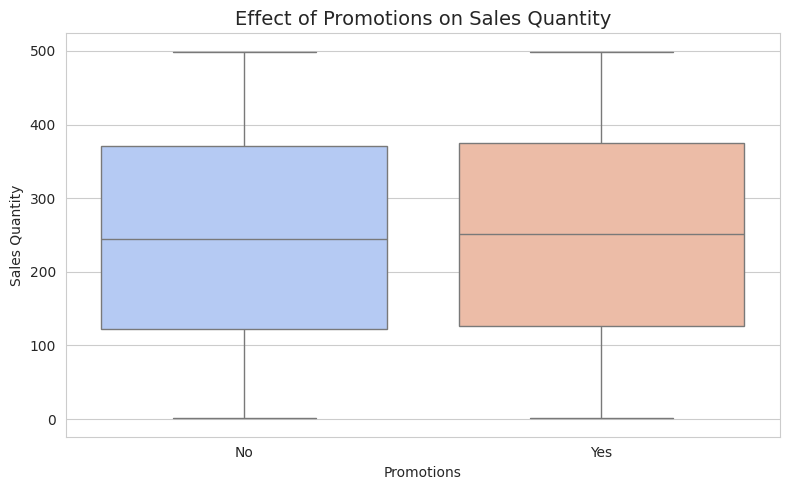

In [21]:
# Plot: Promotions Impact on Sales Quantity
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Promotions', y='Sales Quantity', palette='coolwarm')

plt.title('Effect of Promotions on Sales Quantity', fontsize=14)
plt.xlabel('Promotions')
plt.ylabel('Sales Quantity')
plt.tight_layout()
plt.show()


/tmp/ipython-input-20-609150030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Promotions', y='Sales Quantity', palette='coolwarm')


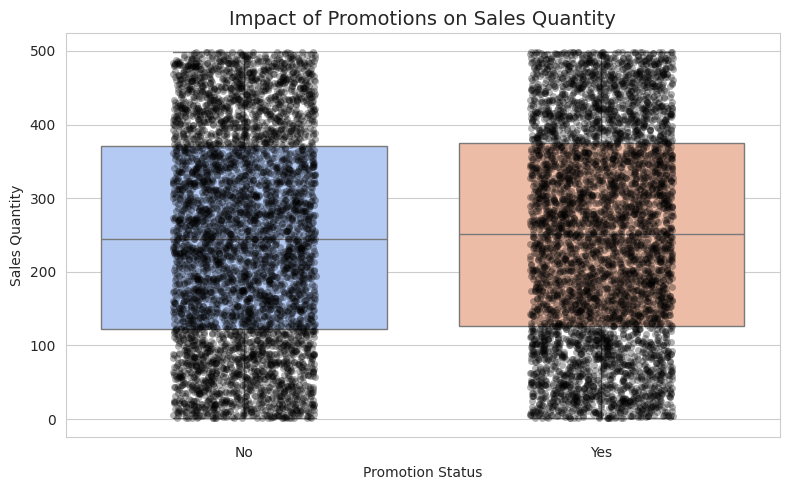

In [20]:
# Plot: Impact of Promotions on Sales Quantity (with individual data points)
plt.figure(figsize=(8, 5))

# Boxplot to show distribution
sns.boxplot(data=df, x='Promotions', y='Sales Quantity', palette='coolwarm')

# Stripplot to show individual data points (optional enhancement)
sns.stripplot(data=df, x='Promotions', y='Sales Quantity',
              color='black', alpha=0.3, jitter=0.2)

plt.title('Impact of Promotions on Sales Quantity', fontsize=14)
plt.xlabel('Promotion Status')
plt.ylabel('Sales Quantity')
plt.tight_layout()
plt.show()


/tmp/ipython-input-23-752923950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


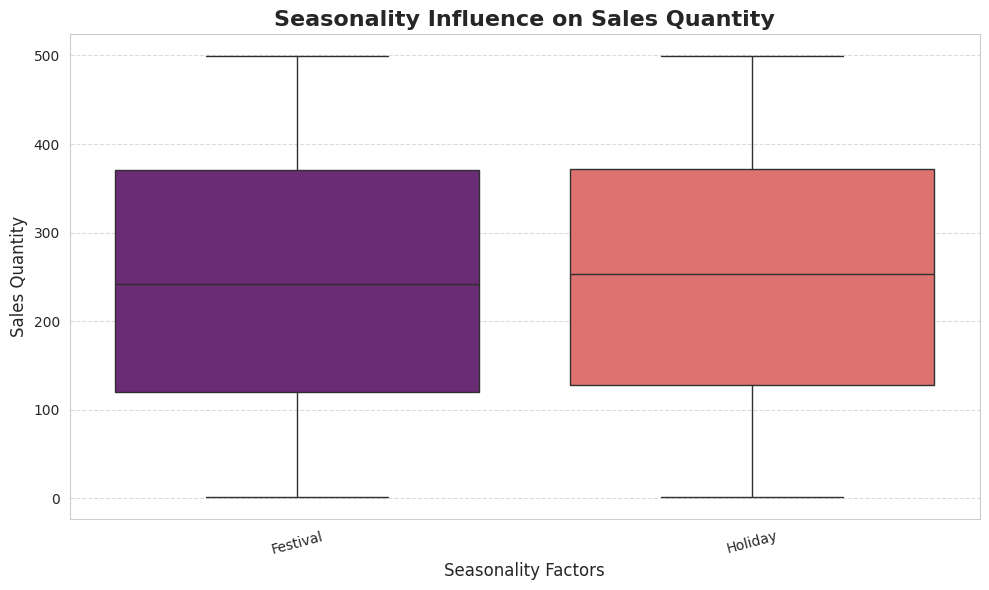

In [23]:
# Visualization: Effect of Seasonality Factors on Sales Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Seasonality Factors',
    y='Sales Quantity',
    palette='magma'
)

plt.title('Seasonality Influence on Sales Quantity', fontsize=16, fontweight='bold')
plt.xlabel('Seasonality Factors', fontsize=12)
plt.ylabel('Sales Quantity', fontsize=12)
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-24-1129991462.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


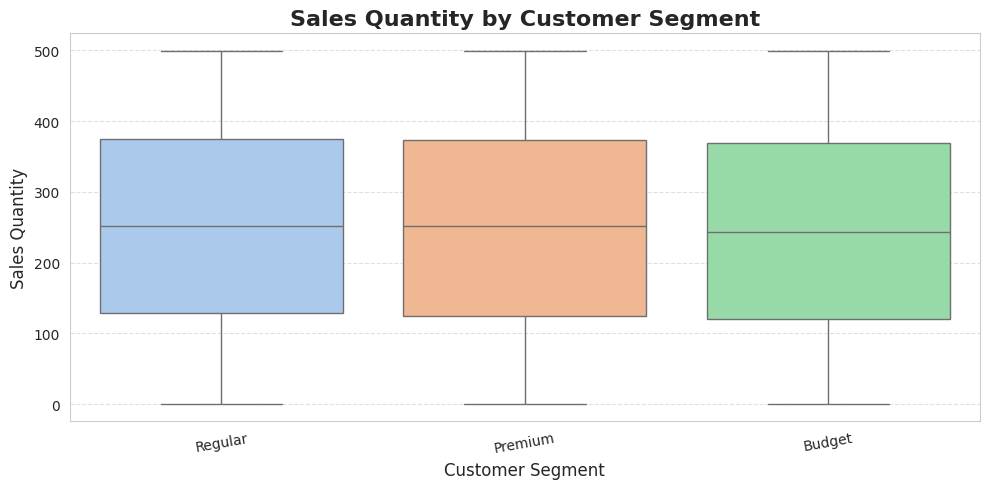

In [24]:
# Visualization: Sales Quantity Across Customer Segments
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x='Customer Segments',
    y='Sales Quantity',
    palette='pastel'
)

plt.title('Sales Quantity by Customer Segment', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Sales Quantity', fontsize=12)
plt.xticks(rotation=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/tmp/ipython-input-32-1363241428.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


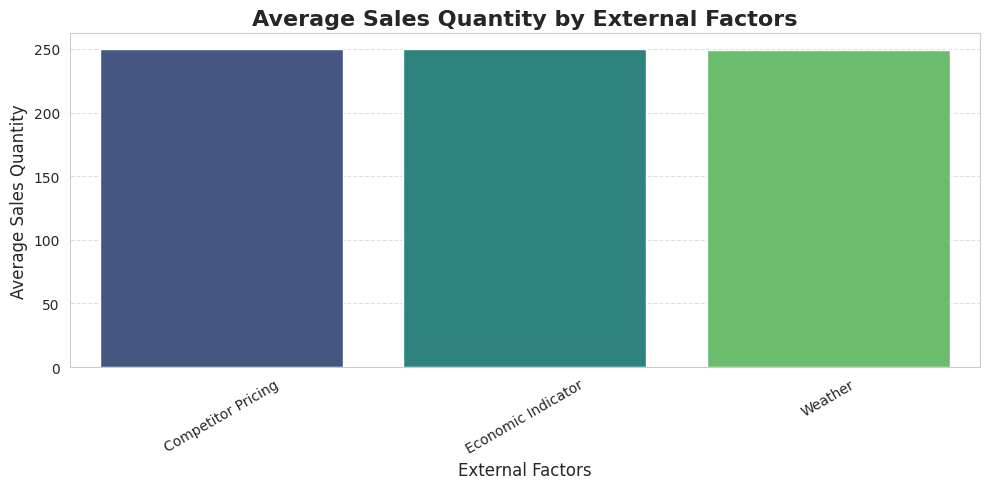

In [32]:
# Visualization: Impact of External Factors on Sales Quantity
plt.figure(figsize=(10, 5))

# Compute average sales per external factor
avg_sales_by_factor = df.groupby('External Factors')['Sales Quantity'].mean().reset_index()

# Bar plot of average sales by external factors
sns.barplot(
    data=avg_sales_by_factor,
    x='External Factors',
    y='Sales Quantity',
    palette='viridis'
)

plt.title('Average Sales Quantity by External Factors', fontsize=16, fontweight='bold')
plt.xlabel('External Factors', fontsize=12)
plt.ylabel('Average Sales Quantity', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


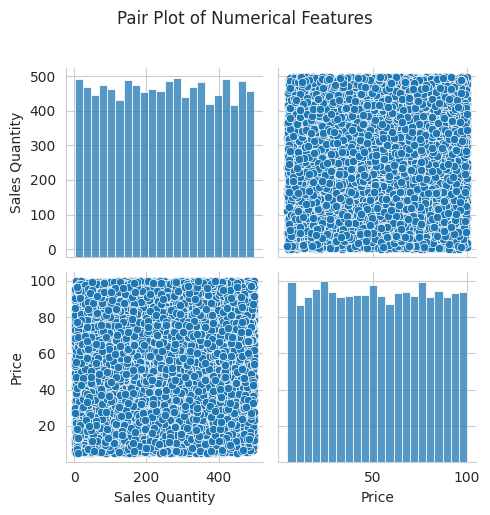

In [25]:
# Pair plot of numeric features: Sales Quantity and Price
sns.pairplot(df[['Sales Quantity', 'Price']])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


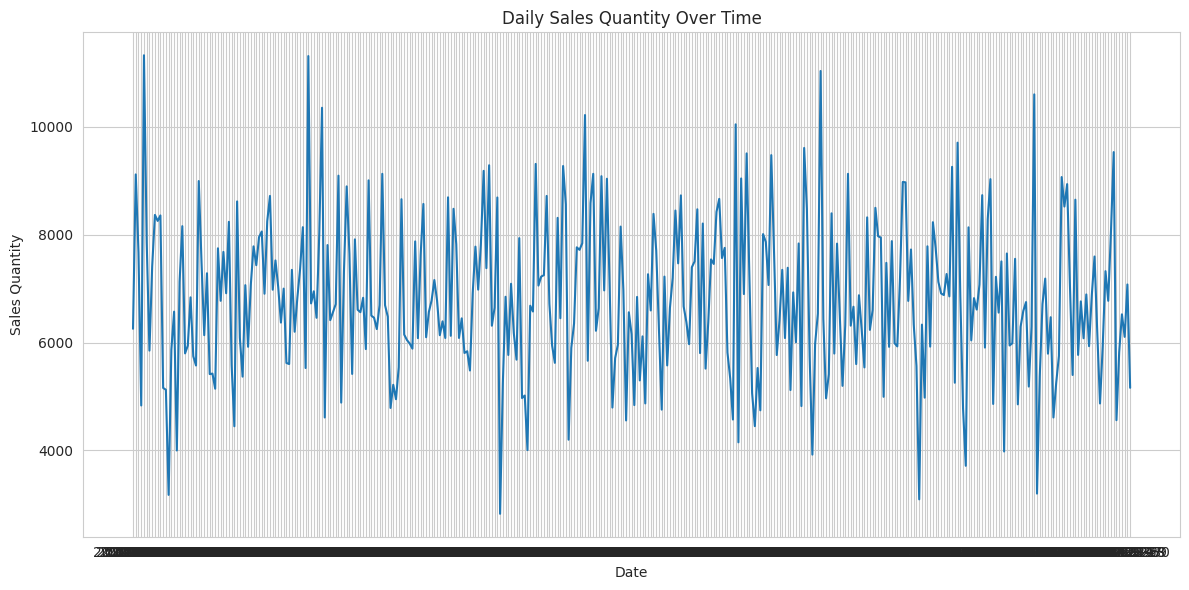

In [26]:
df_daily = df.groupby('Date')['Sales Quantity'].sum().reset_index()

fig5, ax5 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_daily, x='Date', y='Sales Quantity', ax=ax5)
ax5.set_title("Daily Sales Quantity Over Time")
plt.tight_layout()
plt.show()

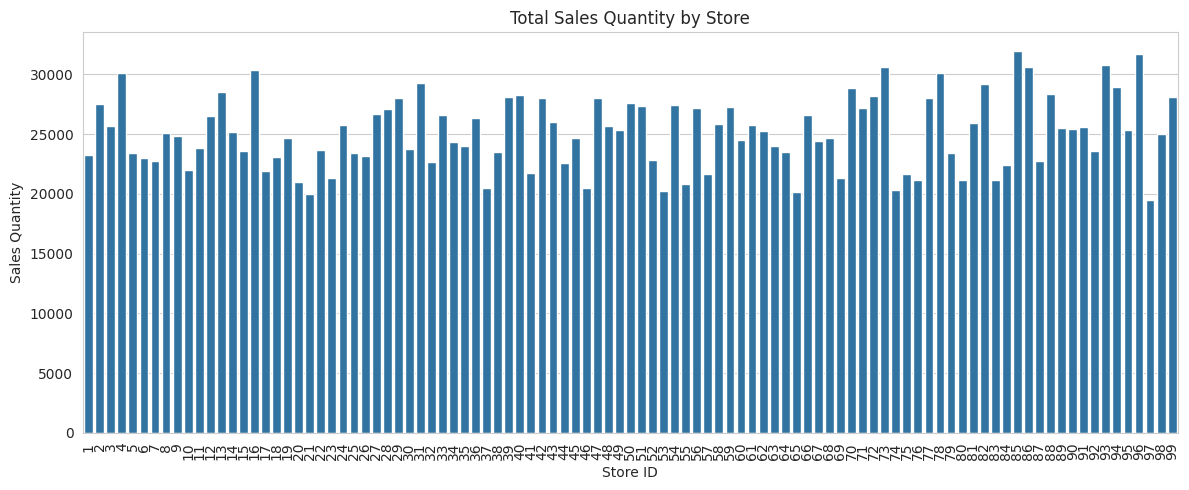

In [28]:
# Sales by Store ID
df_store = df.groupby('Store ID')['Sales Quantity'].sum().reset_index()

fig6, ax6 = plt.subplots(figsize=(12, 5))
sns.barplot(data=df_store.sort_values(by='Sales Quantity', ascending=False), x='Store ID', y='Sales Quantity', ax=ax6)
ax6.set_title("Total Sales Quantity by Store")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

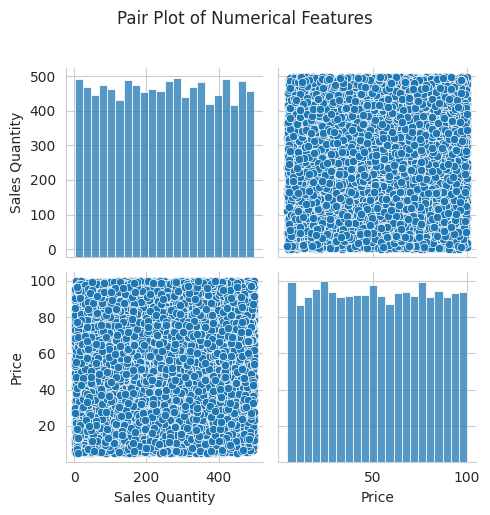

In [29]:
# Pair plot of numeric features: Sales Quantity and Price
sns.pairplot(df[['Sales Quantity', 'Price']])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


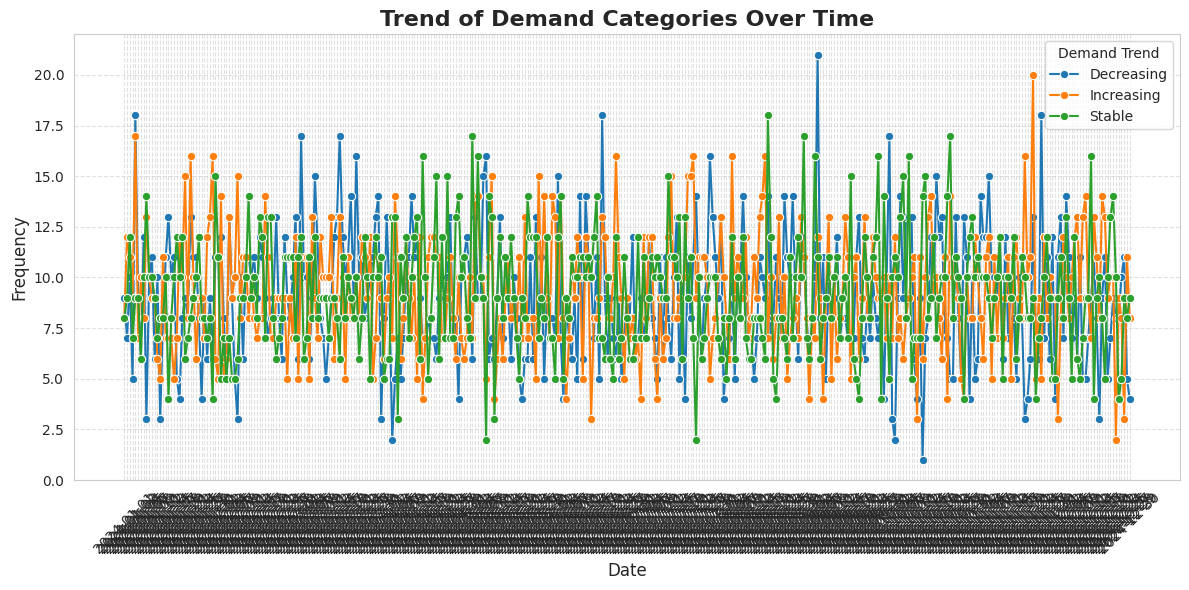

In [27]:
# Professional Visualization: Frequency of Demand Trend Over Time
plt.figure(figsize=(12, 6))

# Count the occurrences of each demand trend per date
trend_over_time = df.groupby(['Date', 'Demand Trend']).size().reset_index(name='Count')

# Lineplot for each demand trend
sns.lineplot(
    data=trend_over_time,
    x='Date',
    y='Count',
    hue='Demand Trend',
    marker='o'
)

plt.title('Trend of Demand Categories Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Demand Trend')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [34]:
import plotly.express as px

# Aggregate total sales by date
sales_by_date = df.groupby('Date')['Sales Quantity'].sum().reset_index()

# Interactive line plot
fig = px.line(sales_by_date, x='Date', y='Sales Quantity',
              title='Total Sales Quantity Over Time',
              labels={'Sales Quantity': 'Sales Quantity', 'Date': 'Date'})

fig.update_layout(template='plotly_white')
fig.show()


In [35]:
fig = px.scatter(df, x='Price', y='Sales Quantity',
                 color='Promotions',
                 hover_data=['Store ID', 'Customer Segments'],
                 title='Price vs. Sales Quantity (Colored by Promotion)',
                 template='plotly_white')

fig.show()


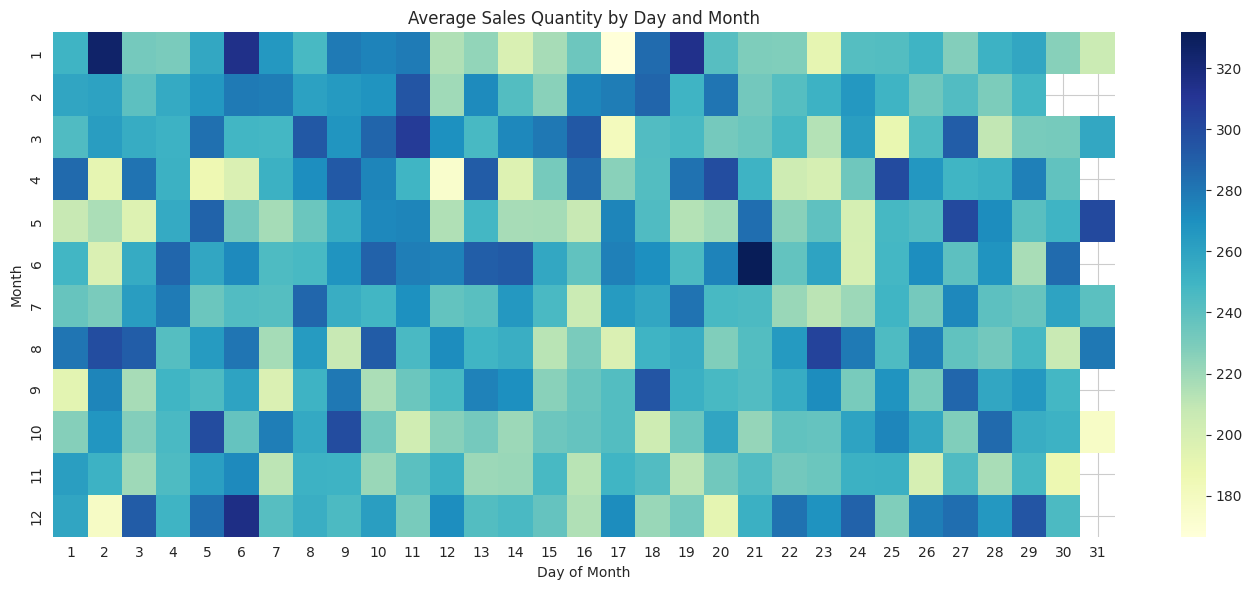

In [41]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

pivot = df.pivot_table(values='Sales Quantity', index='Month', columns='Day', aggfunc='mean')

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Average Sales Quantity by Day and Month")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.tight_layout()
plt.show()


In [42]:
import plotly.express as px

segment_sales = df.groupby('Customer Segments')['Sales Quantity'].sum().reset_index()

fig = px.treemap(segment_sales, path=['Customer Segments'], values='Sales Quantity',
                 title='Sales Contribution by Customer Segment')
fig.show()


In [43]:
sun_data = df.groupby(['Promotions', 'Customer Segments'])['Sales Quantity'].sum().reset_index()

fig = px.sunburst(sun_data, path=['Promotions', 'Customer Segments'], values='Sales Quantity',
                  title='Sales Breakdown by Promotion and Customer Segment')
fig.show()


/tmp/ipython-input-44-3258494446.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




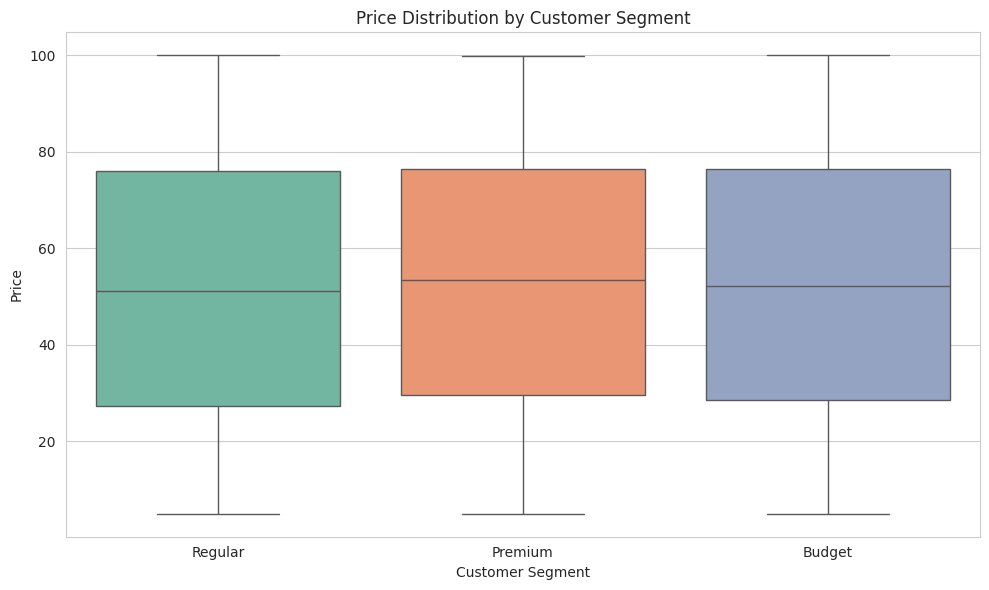

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Customer Segments', y='Price', palette='Set2')
plt.title("Price Distribution by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


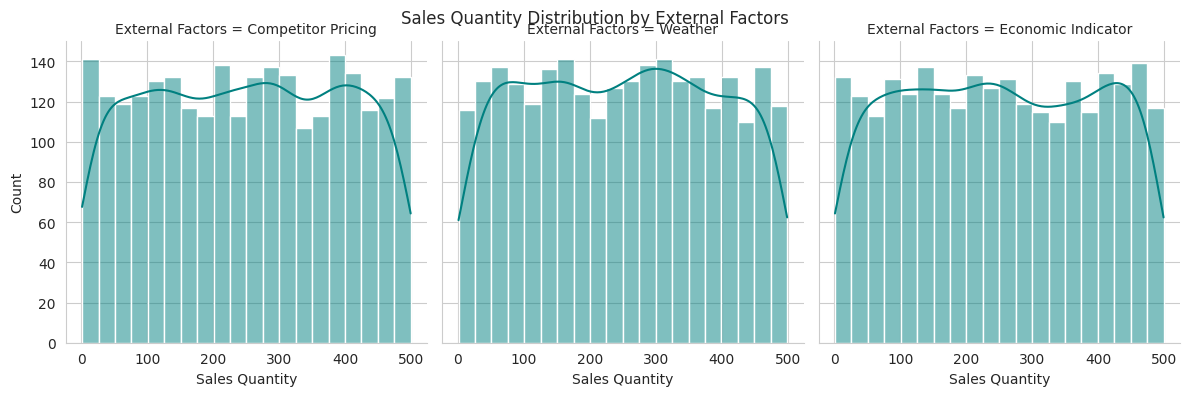

In [45]:
g = sns.FacetGrid(df, col="External Factors", col_wrap=3, height=4)
g.map(sns.histplot, "Sales Quantity", bins=20, kde=True, color="teal")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Sales Quantity Distribution by External Factors")
plt.show()


Predictive Modeling

In [47]:
# 📦 Data Splitting
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# 📦 Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical features and scaling numeric data

# 📦 Regression Models
from sklearn.linear_model import LinearRegression  # Simple linear regression model
from sklearn.svm import SVR  # Support Vector Regression for non-linear regression
from sklearn.neighbors import KNeighborsRegressor  # K-Nearest Neighbors regression
from sklearn.tree import DecisionTreeRegressor  # Decision Tree regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble regressors for improved accuracy

# 📦 Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluating model performance


In [49]:
# 🧹 Drop columns that are not useful or not suitable for model training
# These include identifiers and datetime fields
columns_to_drop = ['Product ID', 'Date', 'Store ID']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [50]:
# 🔤 Label Encoding: Convert categorical string values into numeric codes
label_encoder = LabelEncoder()

# Identify all object-type (categorical) columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))


In [51]:
# 🧼 Handle Missing Values
# Fill any missing numeric values with the median of each column
df.fillna(df.median(numeric_only=True), inplace=True)


In [52]:
# 🎯 Split the dataset into features (X) and target variable (y)
# 'Sales Quantity' is assumed to be the target for prediction
X = df.drop(columns=['Sales Quantity'])
y = df['Sales Quantity']


In [53]:
# 🧪 Split the data into training and testing sets
# 80% training data, 20% testing data, with a fixed random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# 🔄 Feature Scaling: Standardize features to have zero mean and unit variance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
# 🧠 Define a dictionary of regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()}


In [56]:
# 🚀 Train and Evaluate All Models
# Store performance metrics: MAE, RMSE, and R² Score for each model
results = {}

for model_name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R² Score": r2
    }


In [57]:
# 📊 Display Model Performance Metrics
print("🔍 Model Performance Summary:\n")

for model_name, metrics in results.items():
    print(f"{model_name:<25} | MAE: {metrics['MAE']:.2f} | RMSE: {metrics['RMSE']:.2f} | R² Score: {metrics['R² Score']:.2%}")


🔍 Model Performance Summary:

Linear Regression         | MAE: 125.65 | RMSE: 145.26 | R² Score: -0.24%
Random Forest Regressor   | MAE: 128.11 | RMSE: 148.92 | R² Score: -5.36%
Gradient Boosting Regressor | MAE: 125.87 | RMSE: 145.53 | R² Score: -0.62%
Support Vector Regressor (SVR) | MAE: 125.62 | RMSE: 145.15 | R² Score: -0.09%
K-Nearest Neighbors Regressor | MAE: 134.02 | RMSE: 158.26 | R² Score: -19.00%
Decision Tree Regressor   | MAE: 169.65 | RMSE: 207.06 | R² Score: -103.68%


<Figure size 1000x600 with 0 Axes>

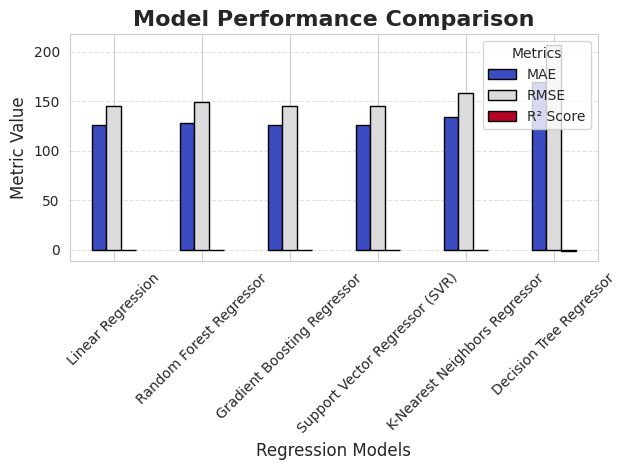

In [58]:
# 📊 Plot: Comparison of Model Performance Metrics
import matplotlib.pyplot as plt

# Convert results dictionary to DataFrame and select relevant metrics
metrics_df = pd.DataFrame(results).T
metrics_df = metrics_df[['MAE', 'RMSE', 'R² Score']]  # Ensure consistent column order

# Create bar plot for comparison
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='coolwarm', edgecolor='black')

# Customize plot aesthetics
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.ylabel('Metric Value', fontsize=12)
plt.xlabel('Regression Models', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


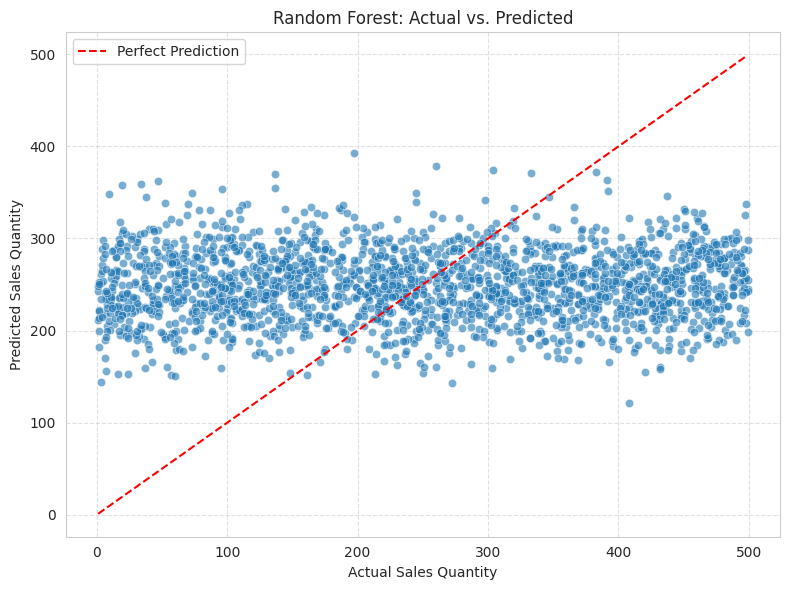

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Show for Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Sales Quantity')
plt.ylabel('Predicted Sales Quantity')
plt.title('Random Forest: Actual vs. Predicted')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


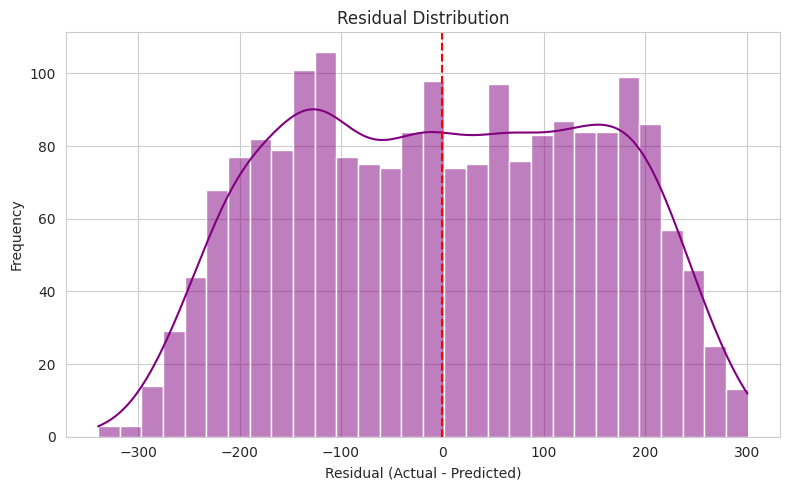

In [60]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


/tmp/ipython-input-61-2329364542.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




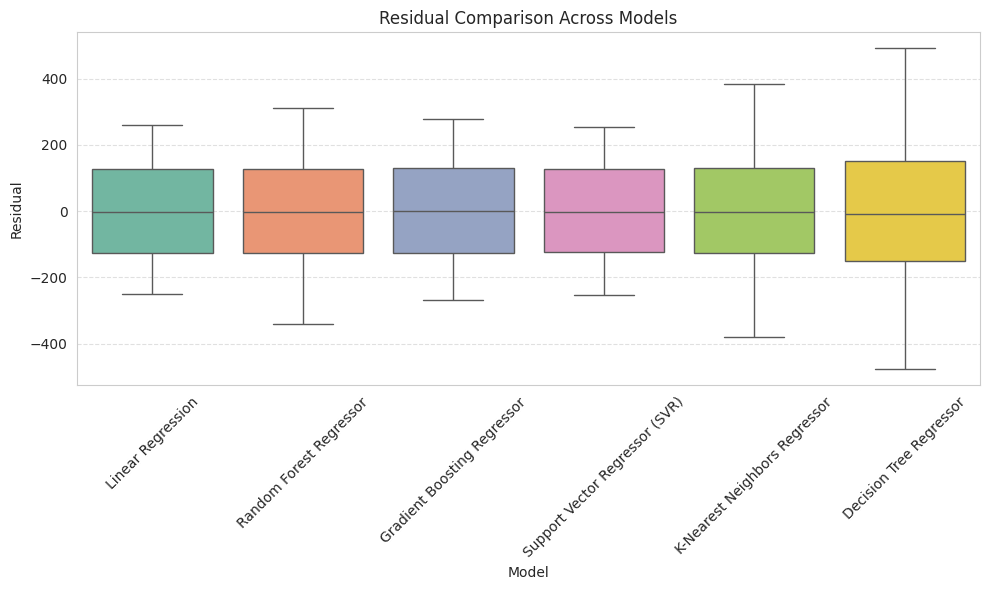

In [61]:
residual_data = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    residual_data.append(pd.DataFrame({'Model': name, 'Residual': residuals}))

residual_df = pd.concat(residual_data)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Residual', data=residual_df, palette='Set2')
plt.title('Residual Comparison Across Models')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


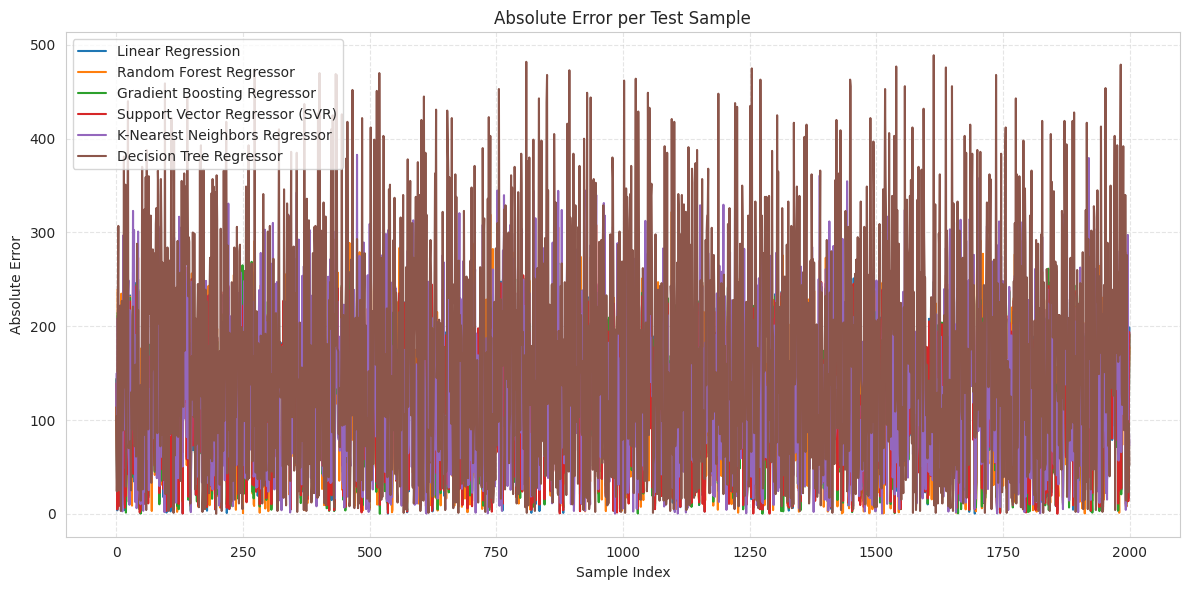

In [62]:
plt.figure(figsize=(12, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = abs(y_test - y_pred).values
    plt.plot(error, label=name)

plt.title("Absolute Error per Test Sample")
plt.xlabel("Sample Index")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
